# Imports

In [80]:
import numpy as np
from scipy import stats
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Hypotesis testing
# 2. Two sample t-test

In a packing plant, a machine packs cartons with jars. It is supposed that a new machine will pack faster on the average than the machine currently used. To test that hypothesis, the times it takes each machine to pack ten cartons are recorded. The results, in seconds, are shown in the tables in the file files_for_lab/machine.txt. Assume that there is sufficient evidence to conduct the t test, does the data provide sufficient evidence to show if one machine is better than the other


### Task

**significance level = 0.05 (95% confidence)  
goal: check if the new machine is significantly better(faster) than the old machine**

### Import data

In [19]:
df = pd.read_csv("files_for_lab/machine.txt", encoding='utf-16', sep='\t')
df

,New machine,Old machine
0,42.1,42.7
1,41.0,43.6
2,41.3,43.8
3,41.8,43.3
4,42.4,42.5
5,42.8,43.5
6,43.2,43.1
7,42.3,41.7
8,41.8,44.0
9,42.7,44.1


In [20]:
df.columns

Index(['New machine', '    Old machine'], dtype='object')

In [25]:
df.rename(columns={"    Old machine": "Old machine"}, inplace=True)

In [48]:
print('Old machine: mean {:.3f}, standard deviation {:.3f}, samples {}'.format(np.mean(df['Old machine']), 
                                                                       np.std(df['Old machine']),
                                                                       df['Old machine'].count()))
print('New machine: mean {:.3f}, standard deviation {:.3f}, samples {}'.format(np.mean(df['New machine']), 
                                                                       np.std(df['New machine']),
                                                                       df['New machine'].count()))

Old machine: mean 43.230, standard deviation 0.711, samples 10
New machine: mean 42.140, standard deviation 0.648, samples 10


In [63]:
mean_old, std_old, n_old = np.mean(df['Old machine']), np.std(df['Old machine']), df['Old machine'].count()
mean_new, std_new, n_new = np.mean(df['New machine']), np.std(df['New machine']), df['New machine'].count()

### Checking data

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='New machine', ylabel='Density'>

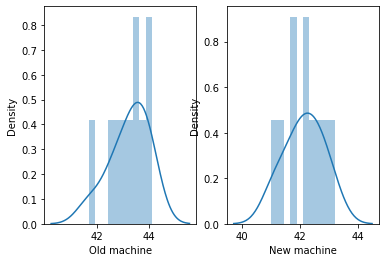

In [95]:
plt.subplot(1, 2, 1)
sns.distplot(df['Old machine'], bins=10)

plt.subplot(1, 2, 2)
sns.distplot(df['New machine'], bins=10)

### Define the problem

We are interested in testing the hypothesis that the mean time difference between the two samples is statistically zero, or, in other words, that there is statistically no difference between the average time of the old machine and the new machine. 

As the new machine seems to be slightly faster on average, we state the alternative hypothesis that the new machine average time is smaller than the old machine average time. This is a left-tailed two samples t-test that can be stated as follows: 

**- H0: The mean time difference between the two samples is statistically zero.**  
H0: µ_old - µ_new = 0  

**- HA: The difference between the old mean and the new mean is smaller than zero.**  
HA: µ_old - µ_new ≤ 0


So, the probability of the new mean time being statistically smaller than the old mean time is equal to the idea of finding a t-statistics value more extreme than our critical value. 

- P(µ_old - µ_new ≤ 0)
- P(t-critical < t-statistics) 
- P(t-critical < (mean_difference / standard_error))
- P(t-critical < (μ_old - μ_new) / (sqr((std_old/n_old) + (std_new/n_new)))

### Set up confidence - t-critical value

Determining a t-critical value from the Z distribution. How likely are we to reject the Null Hypotesis when it is actually true (Type I error rate).

- α = Level of significance = P(Type I error) = P(Reject H0 | H0 is true) = 0.05 (95% of confidence)  
- dof (degrees of freedom) = n - 1 = 9  
- t-critical = 1.833 (from tables, one tailed test)

### Calculating our t-statistics

In [51]:
difference_between_means = mean_old - mean_new
standard_error_for_the_mean = math.sqrt((std_old/n_old)+(std_new/n_new))
t = round((difference_between_means / standard_error_for_the_mean), 3)
print(t)

2.956


### Results

In [53]:
t_critical = 1.833  # t_critical is usually written as t_0.05_9
t_statistics = t

t_critical < t_statistics

True

### Conclusions

Our t-statistics is more extreme than the t-critical value. So we can reject the null hypothesis, that the difference of the mean times is equal to zero.  
In that case, we have statistical evidence to say that the mean time of the new machine is statistically smaller than the mean time of the old machine.

We can establish confidence limits around the mean of the difference between the two samples to see it clearly:  

In [56]:
l_1 = (difference_between_means) - t_critical * standard_error_for_the_mean
l_2 = (difference_between_means) + t_critical * standard_error_for_the_mean
print('lower {:.2f} and upper {:.2f}'.format(l_1, l_2))

lower 0.41 and upper 1.77


We can put confidence limits around the difference between the two means to see whether a value of zero is a valid estimate of the difference between the two. This is what our null hypothesis asks. 

As the lower bound and the upper bound are both a positive number, the confidence does not encompass zero indicating that zero (our hypothesized difference) is not a valid estimate of the mean difference between the two samples. This conclusion is obviously the same as the previous test, also stating that we can reject the Null Hypothesis.

### Checking results

We are checking the conclusions calculating the p-value.  
To calculate the p-value, we will use the survival function (sf = 1 - cdf (cumulative distribution function)) for the given t-statistics value and dof.

In [105]:
t_stat = t
dof = 9
alpha = 0.05

In [106]:
p_value = round(stats.t.sf(abs(t_stat), df=dof), 3) # multiply by two as it is a two sided test
# 2*(1 - stats.t.cdf(abs(t), df=dof)) -- same results

In [107]:
print(p_value)

0.008


In [110]:
p_value < alpha

True

We can reject the Null Hipotesis.

# Test with scipy.stats libary

In [114]:
ttest, pvalue = stats.ttest_ind(df['Old machine'], df['New machine'])
print('p-value:', pvalue) # if the hypothesis was two tailed, we would need p-value/2
print("CONCLUSION:")
if pvalue < alpha:
    print("p-value:{} < alpha:{}".format(p_value, alpha))
    print("reject null hypothesis")
else:
    print("p-value:{} !< alpha:{}".format(p_value, alpha))
    print("no evidence to reject the null hypothesis")

p-value: 0.0032111425007745158
CONCLUSION:
p-value:0.008 < alpha:0.05
reject null hypothesis
